In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [8]:
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter("ignore")

## K-Means (PCA)

In [15]:
PCA_ds = pd.read_csv('data_reduccion_PCA.csv',sep=',')
PCA_ds.head()

,col1,col2,col3,col4,col5,col6
0,4.933287,-0.268851,0.297444,3.261175,-0.538835,0.372328
1,-2.935435,0.018579,-0.456699,-1.251371,-0.694831,1.940288
2,2.367150,-0.741681,-1.206743,-0.012712,-0.409824,-0.388788
3,-2.716321,-1.461183,-0.055200,-0.433844,1.155659,-0.284942
4,-0.795007,0.152362,-0.739367,-0.057153,1.258259,-1.264634


In [16]:
data = pd.read_csv('data_transformada_escalada.csv',sep=',')
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


### Recuerde:
Cada componente principal es una combinación lineal de las variables originales que maximiza la varianza.
### Varianza explicada:
La varianza explicada por cada componente principal indica qué tan bien esa componente captura la variabilidad de los datos.
### Varianza explicada acumulada:
Es la suma de las varianzas explicadas por todas las componentes seleccionadas hasta un cierto punto. Esto ayuda a decidir cuántas componentes se necesitan para retener una cantidad significativa de la información original.

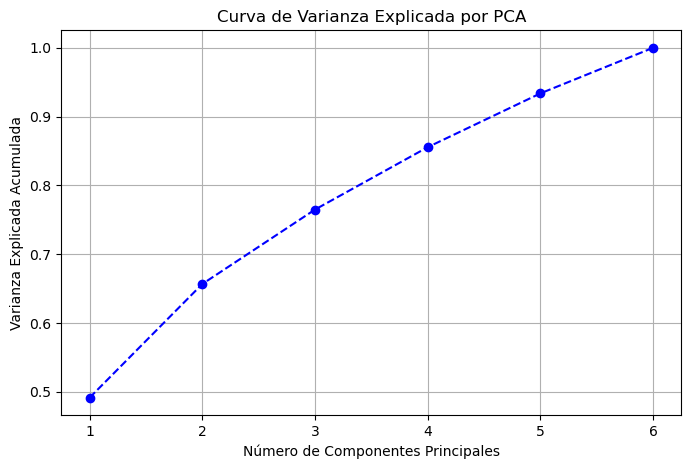

col1    0.491326
col2    0.656599
col3    0.764811
col4    0.855474
col5    0.933698
col6    1.000000
dtype: float64


In [4]:
varianza_explicada = np.var(PCA_ds, axis=0) / np.var(PCA_ds, axis=0).sum()
varianza_acumulada = np.cumsum(varianza_explicada)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Curva de Varianza Explicada por PCA')
plt.grid(True)
plt.show()

print(varianza_acumulada)


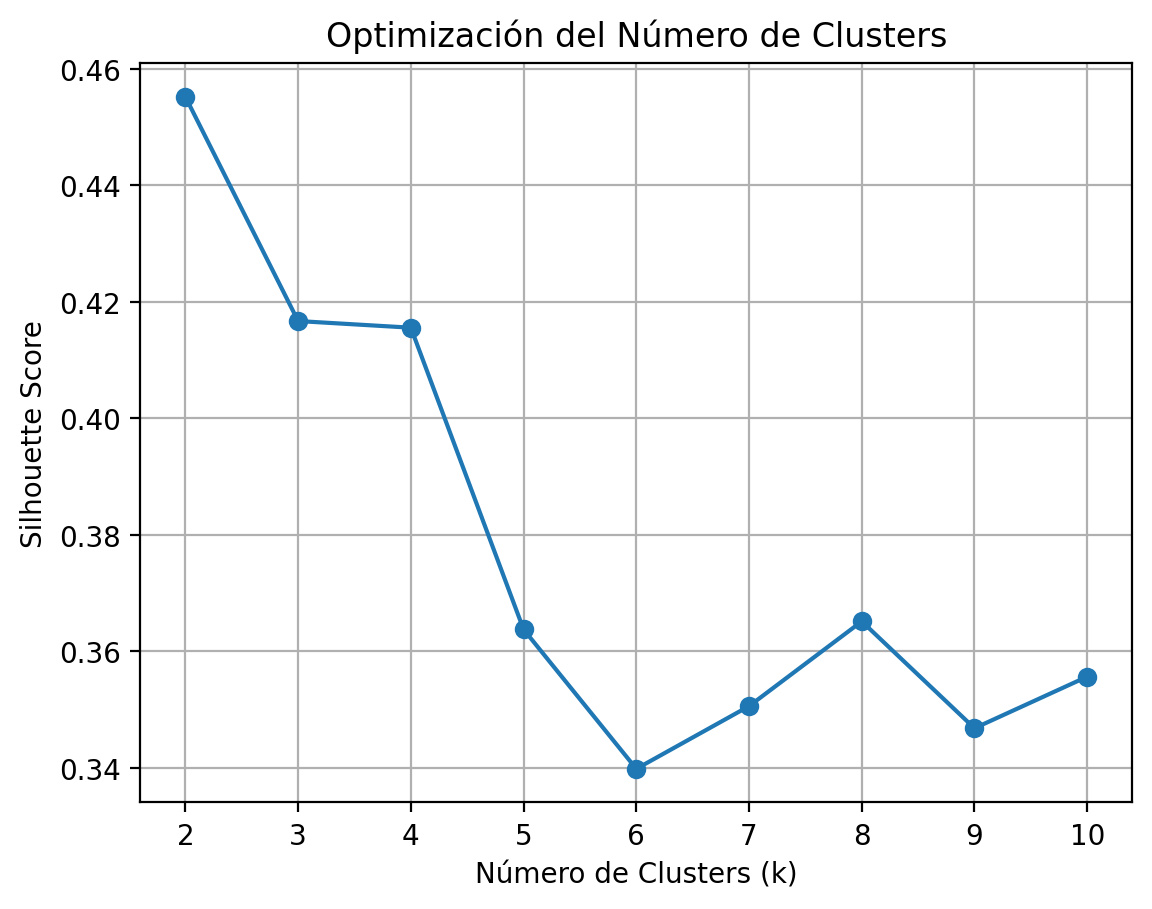

In [30]:
PCA_ds = PCA_ds.iloc[:,:3]
scores = []
rango_k = range(2, 11)
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = kmeans.fit_predict(PCA_ds) 
    score = silhouette_score(PCA_ds, etiquetas)  
    scores.append(score)

plt.plot(rango_k, scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimización del Número de Clusters')
plt.grid(True)
plt.show()

In [35]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(PCA_ds) 
score = silhouette_score(PCA_ds, etiquetas)
print(f"Silhouette score = {score}")
dbi_kmeans = davies_bouldin_score(PCA_ds, etiquetas)
print(f"Davies-Bouldin Index - KMeans: {dbi_kmeans}")
PCA_ds['Cluster'] = etiquetas
data['Cluster'] = etiquetas

Silhouette score = 0.4648868539930206
Davies-Bouldin Index - KMeans: 0.9122617614683376


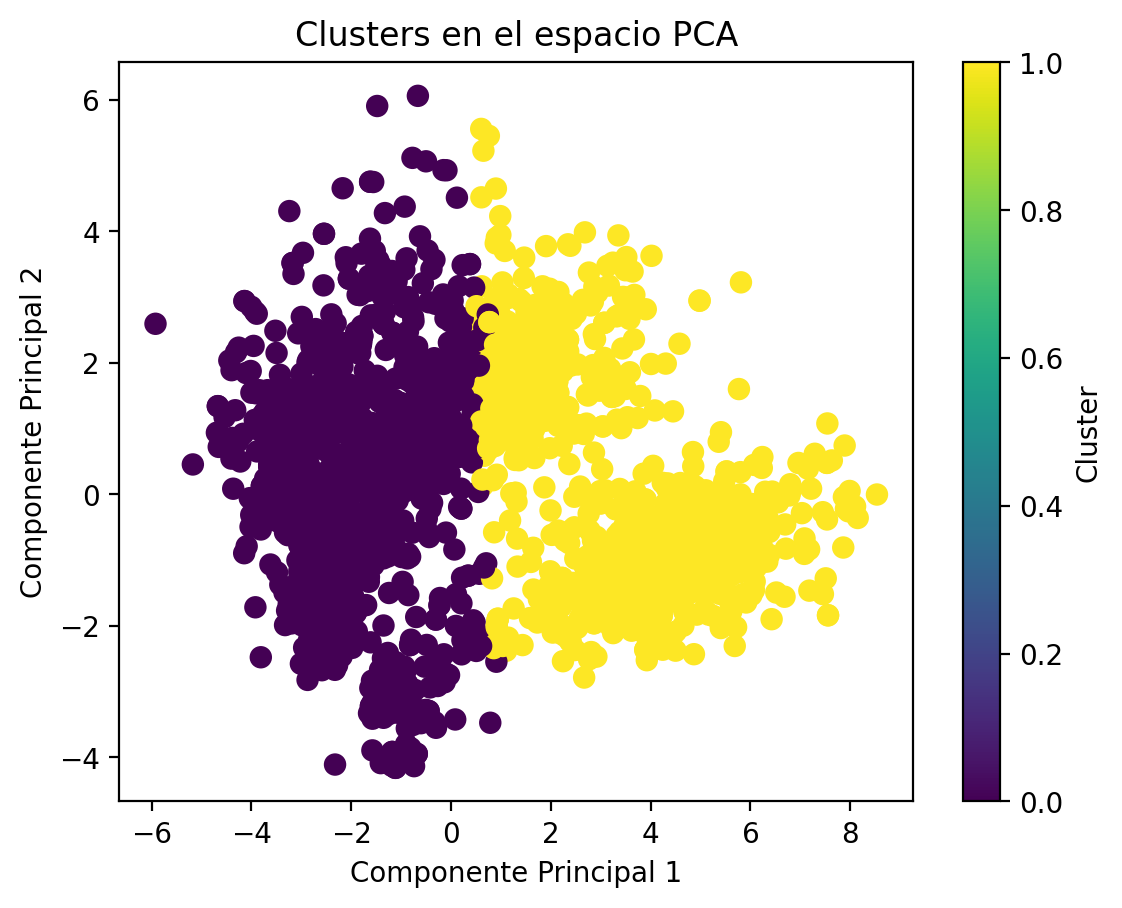

In [32]:
x = PCA_ds.iloc[:, 0] 
y = PCA_ds.iloc[:, 1]  

plt.scatter(x, y, c=modelo.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

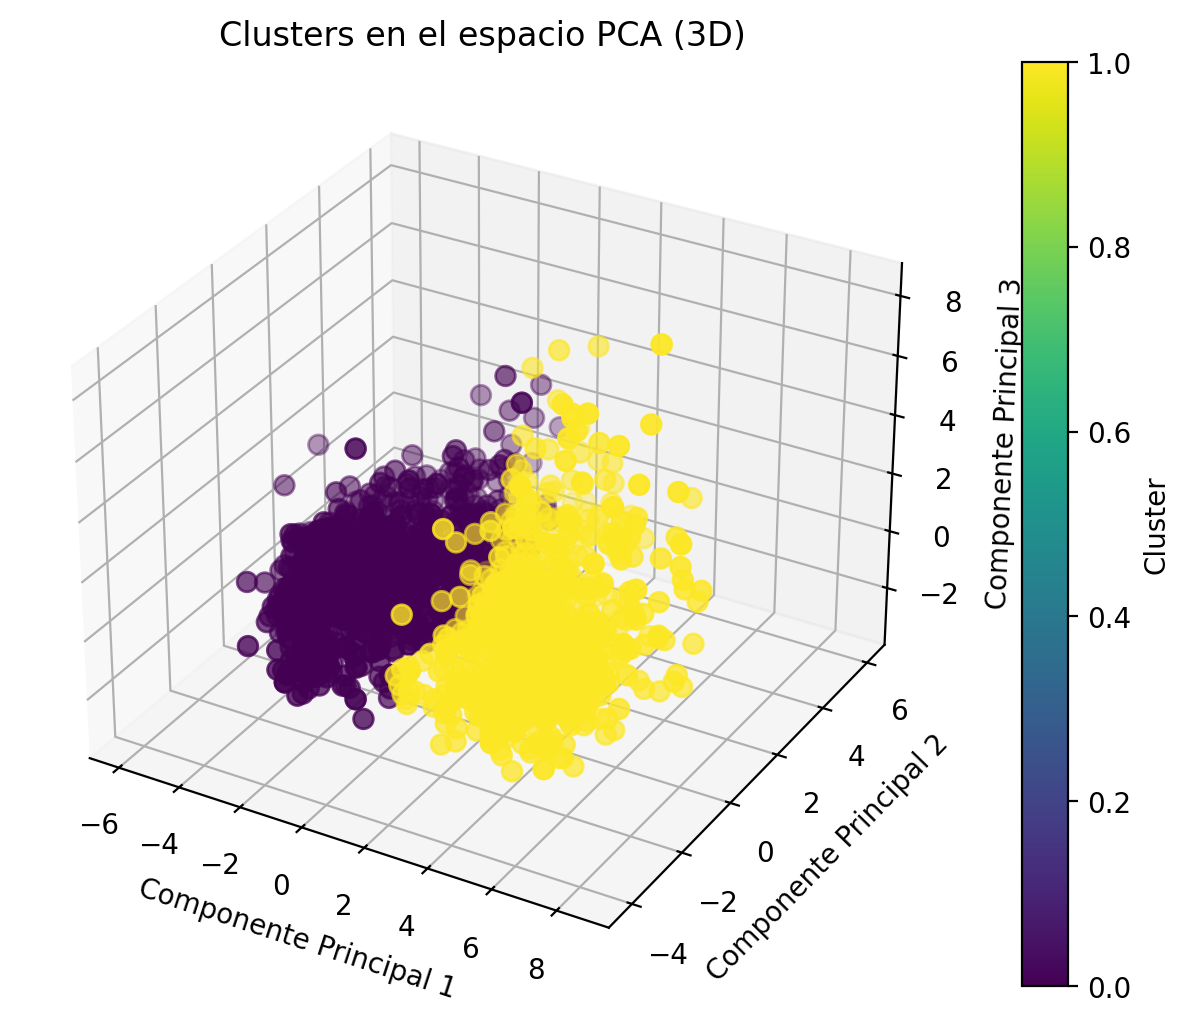

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_ds.iloc[:, 0]  
y = PCA_ds.iloc[:, 1]  
z = PCA_ds.iloc[:, 2]  

scatter = ax.scatter(x, y, z, c=modelo.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

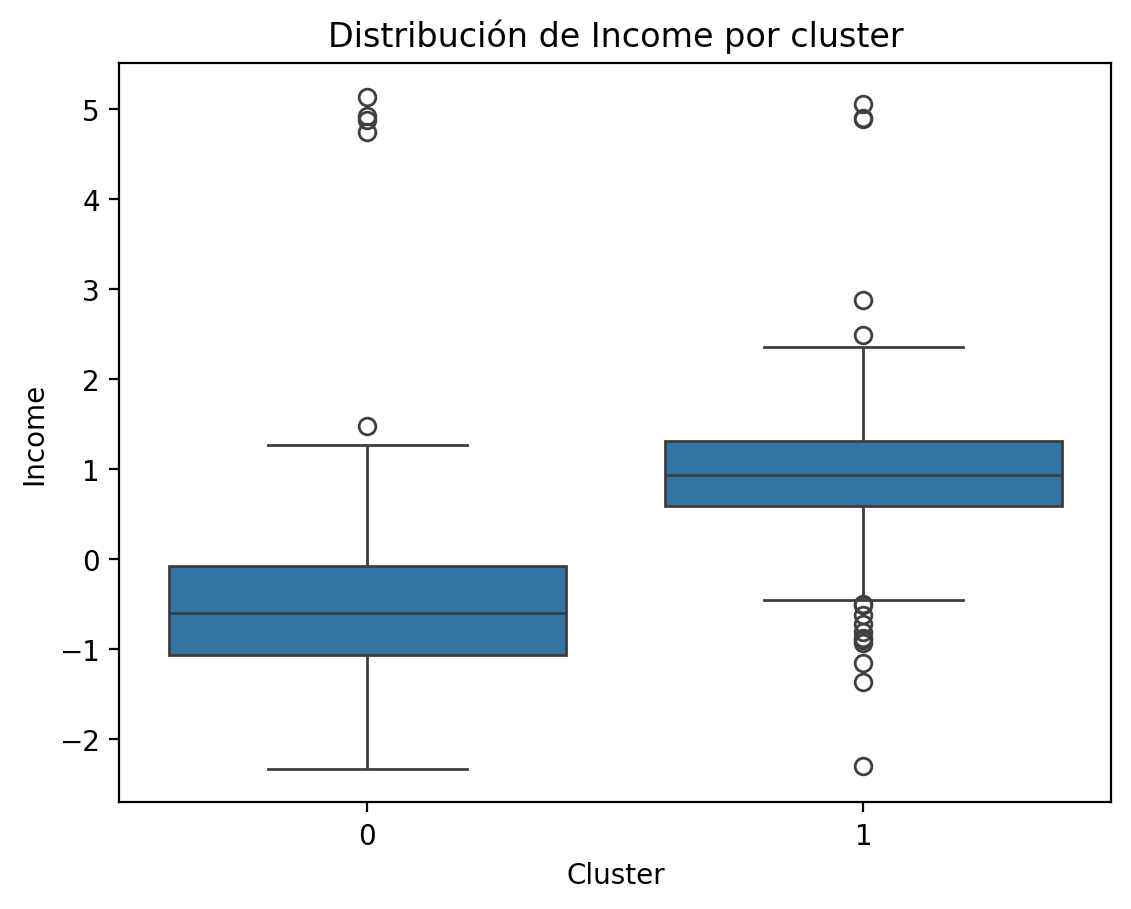

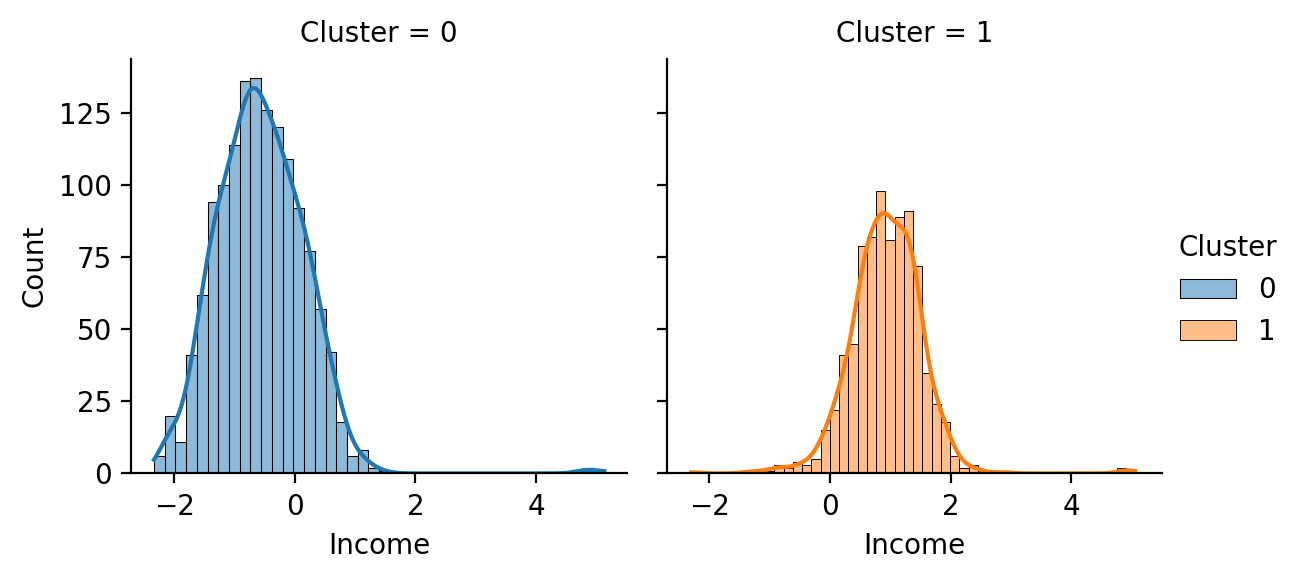

In [36]:
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Distribución de Income por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "Income", kde=True).add_legend()
plt.show()

## K-Means (TSNE)

In [37]:
TSNE_ds = pd.read_csv('data_reduccion_TSNE.csv',sep=',')
TSNE_ds.head()

,col1,col2
0,30.620274,-7.712108
1,-48.222248,12.715313
2,28.431597,-21.590351
3,-50.654060,-22.825716
4,-36.348347,-20.864601


In [38]:
data = pd.read_csv('data_transformada_escalada.csv',sep=',')
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [47]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(TSNE_ds) 
score = silhouette_score(TSNE_ds, etiquetas)
print(f"Silhouette score = {score}")
dbi_kmeans = davies_bouldin_score(TSNE_ds, etiquetas)
print(f"Davies-Bouldin Index - KMeans: {dbi_kmeans}")
TSNE_ds['Cluster'] = etiquetas
data['Cluster'] = etiquetas

Silhouette score = 0.48526903937979493
Davies-Bouldin Index - KMeans: 0.7269417095089384


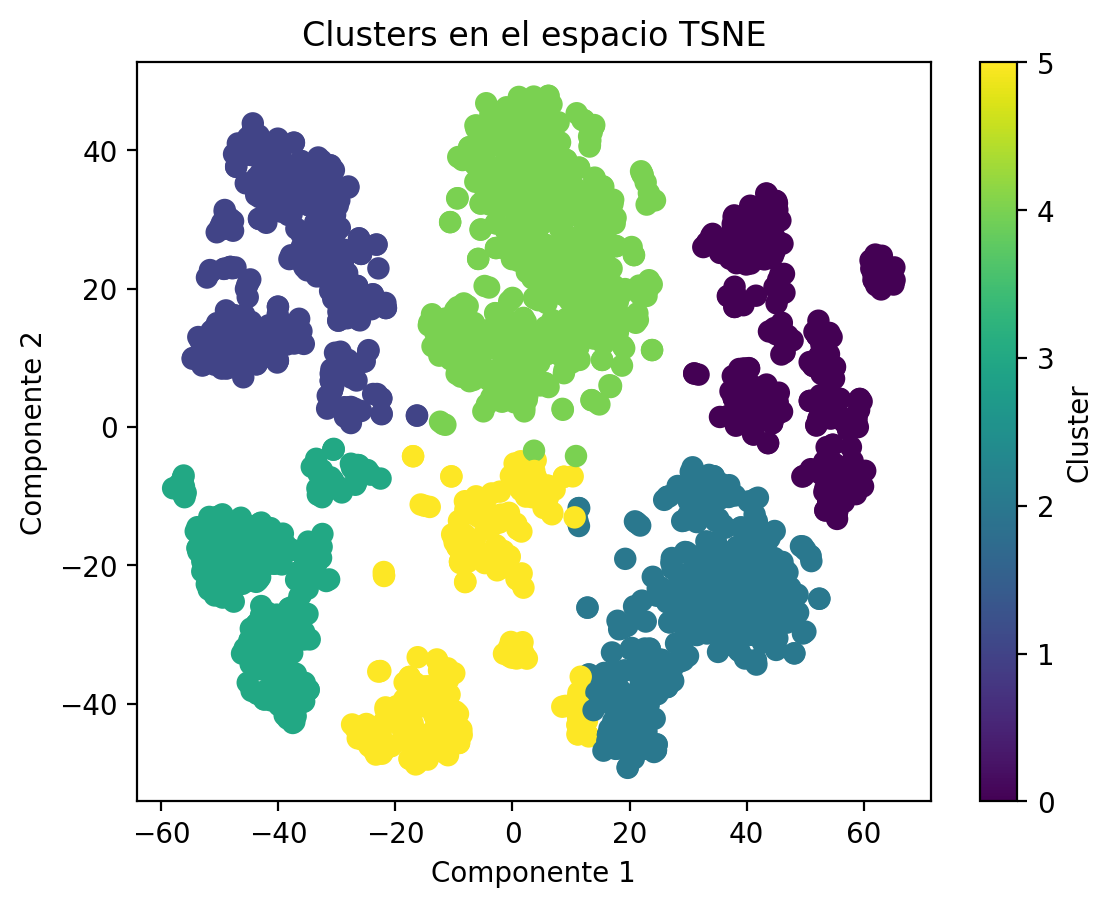

In [48]:
x = TSNE_ds.iloc[:, 0] 
y = TSNE_ds.iloc[:, 1]  

plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio TSNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

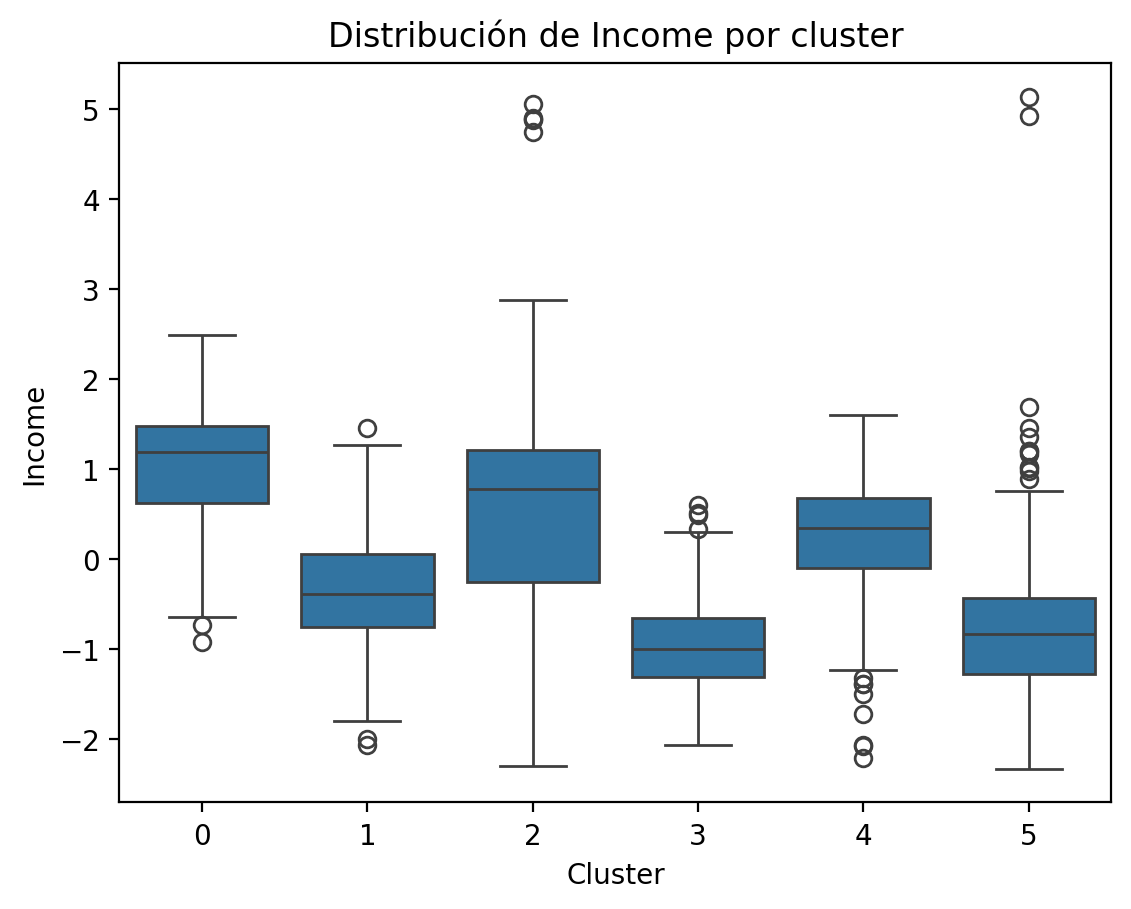

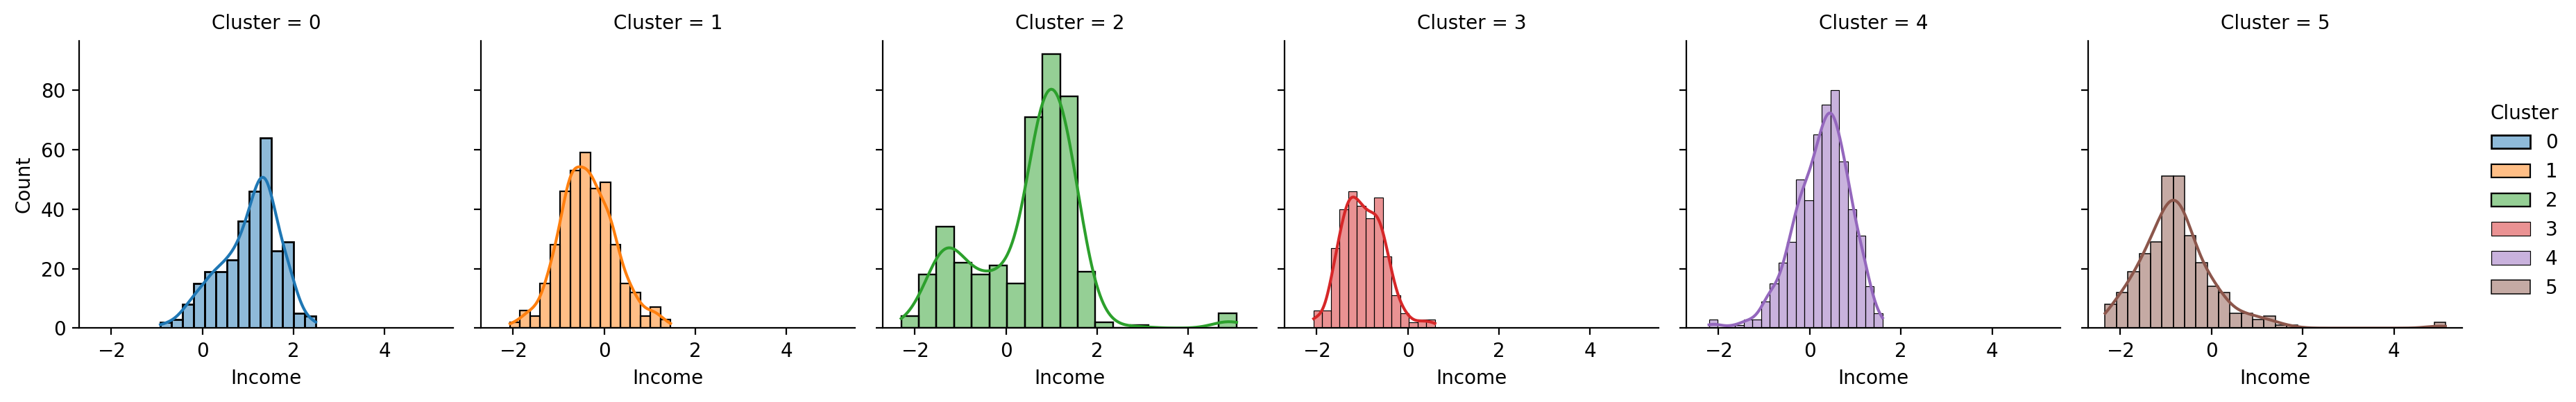

In [49]:
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Distribución de Income por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "Income", kde=True).add_legend()
plt.show()

## K-Means (UMAP)

In [51]:
UMAP_ds = pd.read_csv('data_reduccion_UMAP.csv',sep=',')
UMAP_ds.head()

,col1,col2
0,7.947662,12.219968
1,11.329375,-0.086987
2,5.836195,12.522989
3,6.380645,-6.642157
4,8.008347,-6.492001


In [52]:
data = pd.read_csv('data_transformada_escalada.csv',sep=',')
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [59]:
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(UMAP_ds) 
score = silhouette_score(UMAP_ds, etiquetas)
print(f"Silhouette score = {score}")
dbi_kmeans = davies_bouldin_score(UMAP_ds, etiquetas)
print(f"Davies-Bouldin Index - KMeans: {dbi_kmeans}")
TSNE_ds['Cluster'] = etiquetas
data['Cluster'] = etiquetas

Silhouette score = 0.7035246192281687
Davies-Bouldin Index - KMeans: 0.40064025716279217


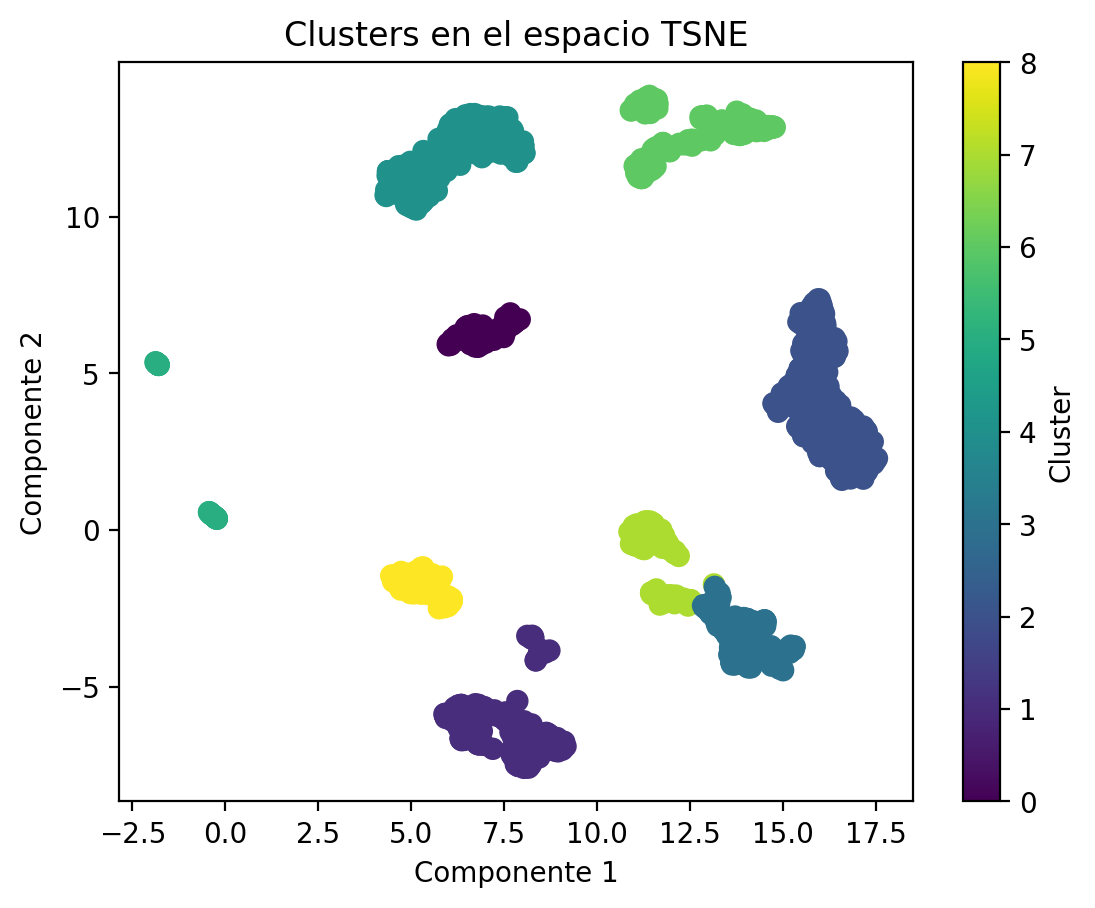

In [60]:
x = UMAP_ds.iloc[:, 0] 
y = UMAP_ds.iloc[:, 1]  

plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio TSNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

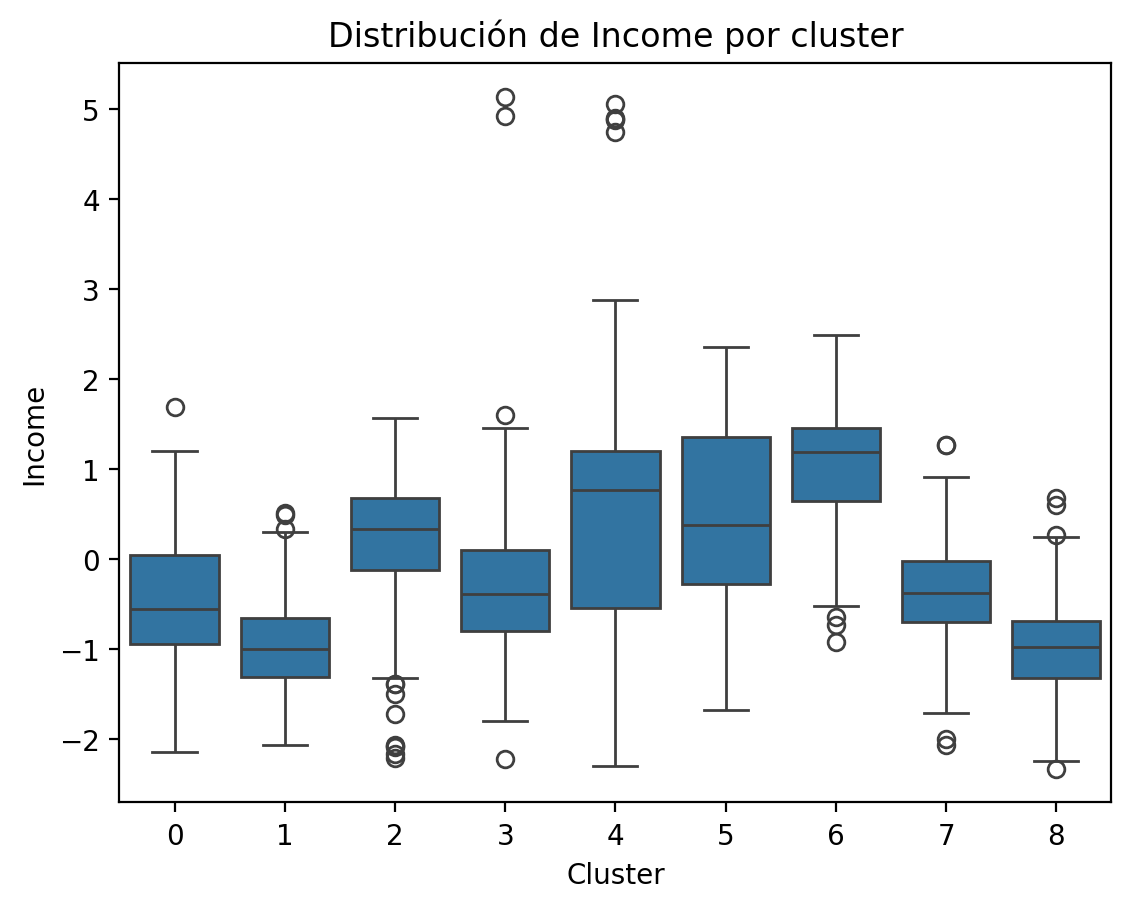

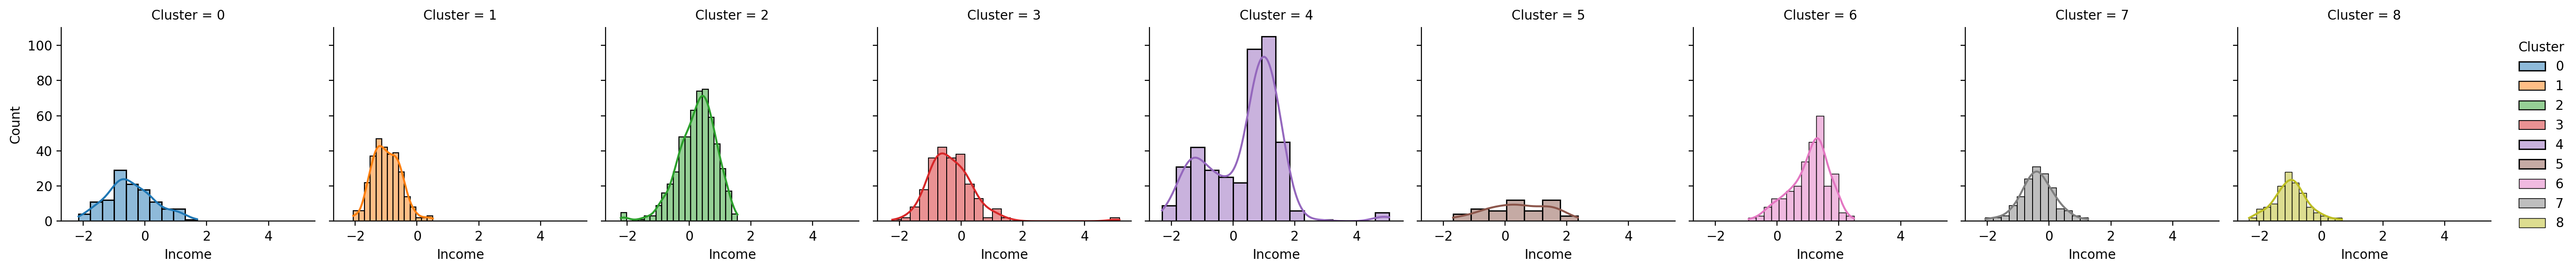

In [61]:
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Distribución de Income por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "Income", kde=True).add_legend()
plt.show()